In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import seaborn as sns

/tmp/ipykernel_36477/1938230582.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


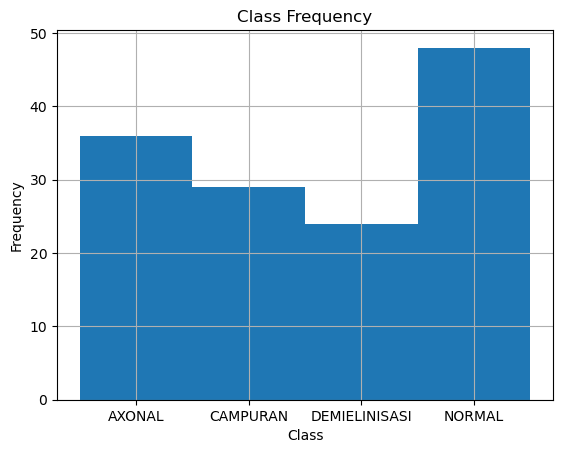

In [2]:

features_names = ['VAR','RMS','IEMG','MAV',
                  'LOG','WL','ACC','DASDV','ZC','WAMP','MYOP','FR','MNP','TP','MNF','MDF','PKF','WENT']

dataset = pd.read_csv('cls_sampling_1024_frame120_step60.csv')

df = pd.DataFrame(dataset)
df = df.fillna(df.mean())
df = df.sample(frac=1)

X = df[features_names]
y = df['target']

# plt.figure(figsize=(12,10))
# cor = X.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
# print(df.isnull().values.any())


unique, counts = np.unique(y, return_counts=True)
pd.DataFrame(unique)[0].hist()
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# clf = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=100, random_state=1)
# clf = MultinomialNB()
clf = svm.SVC(
    kernel='rbf',
    C=100,
    gamma=0.001
)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)


# print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         6
           1       0.33      0.22      0.27         9
           2       0.00      0.00      0.00        11
           3       0.53      0.62      0.57        16

    accuracy                           0.36        42
   macro avg       0.26      0.34      0.28        42
weighted avg       0.30      0.36      0.32        42



In [5]:
print(confusion_matrix(y_test,predictions))

[[ 3  0  0  3]
 [ 3  2  2  2]
 [ 4  3  0  4]
 [ 5  1  0 10]]
